Lib
---


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install anchor-exp

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install alibi[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5
from eli5.lime import TextExplainer

In [ ]:
!pip install torch transformers spacy && python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 9.2 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
!pip install torch transformers spacy && python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 7.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False # if autocompletion doesnot work in kaggle notebook | hit tab

In [ ]:
import numpy as np
import pandas as pd
#import torch
#import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
#device = torch.device("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]


Load Data
---



In [ ]:
df=pd.read_csv("mixed_domain_godamit.csv",usecols=["data","label","index"],index_col="index")

In [ ]:
df

,data,label
index,,
0,u budget fight looms republicans flip fiscal s...,1
1,u military accept transgender recruits monday ...,1
2,senior u republican senator let mr mueller job,1
3,fbi russia probe helped australian diplomat ti...,1
4,trump wants postal service charge much amazon ...,1
...,...,...
63603,rapper trump poster child white supremacy,0
63604,n f l playoffs schedule matchups odds new york...,0
63605,macy said receive takeover approach hudson bay...,0


In [ ]:
import pandas as pd
df1=pd.read_csv("covid_kd_val.csv",usecols=["data","label","index"],index_col="index")
df2=pd.read_csv("covid_kd_test.csv",usecols=["data","label","index"],index_col="index")

In [ ]:
df1

,data,label
index,,
6820,whoever says covid like flu obviously know mat...,0
6821,ok bite coronavirus,1
6822,programming alert exclusive documentary origin...,0
6823,antiviral remdesivir prevents disease progress...,1
6824,feng county xuzhou city closed rumor,0
...,...,...
24350,nih launch public private partnership speed co...,1
24351,tough questions like covid,1
24352,wear mask protect frequently asked questions c...,1


In [ ]:
df2

,data,label
index,,
0,taking hot bath prevent new coronavirus diseas...,1
1,coronavirus vaccines months fake news,0
2,april different covid vaccine candidates devel...,1
3,claim german parliament passed law september c...,0
4,dominic raab said covid tests false positive rate,0
...,...,...
6815,royal palace confirms queen elizabeth tests po...,0
6816,claim new york times said tunisia country beta...,0
6817,mask resellers bought million masks one week,0


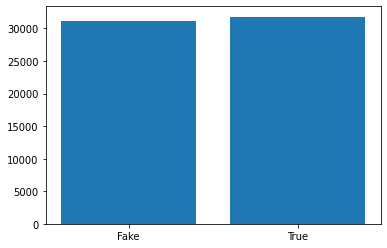

In [ ]:
import matplotlib.pyplot as plt
classes = df.label.unique()
counts = []

for i in classes:
  count = len(df[df.label==i])
  counts.append(count)

plt.bar(['Fake', 'True'], counts)
plt.show()

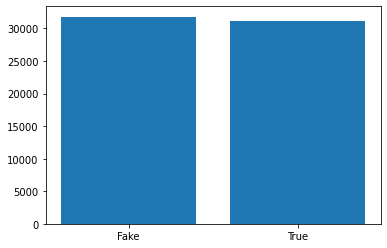

In [ ]:
import matplotlib.pyplot as plt
classes = df1.label.unique()
counts = []

for i in classes:
  count = len(df[df.label==i])
  counts.append(count)

plt.bar(['Fake', 'True'], counts)
plt.show()

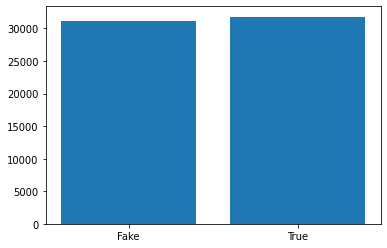

In [ ]:
import matplotlib.pyplot as plt
classes = df2.label.unique()
counts = []

for i in classes:
  count = len(df[df.label==i])
  counts.append(count)

plt.bar(['Fake', 'True'], counts)
plt.show()

In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df.loc[:int(0.8*df.shape[0]),'data'],df.loc[:int(0.8*df.shape[0]):,'label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.2, 
                                                                    stratify=df.loc[:0.8*int(df.shape[0]),'label'])

In [ ]:
val_text_cov=df1.loc[:,"data"].values
val_labels_cov=df1.loc[:,"label"].values
test_text_cov=df2.loc[:,"data"].values
test_labels_cov=df2.loc[:,"label"].values

In [ ]:
val_labels_cov[0]

0


Tokenizer
---



In [ ]:
from transformers import AutoTokenizer,TFAutoModel

In [ ]:
model_name="bert-base-uncased"
bert = TFAutoModel.from_pretrained(model_name)
tokenizer = BertTokenizerFast.from_pretrained(model_name)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
max_seq_len = 15
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False,
    padding=True, 
    return_tensors='tf',
    return_attention_mask = True,
    verbose = True
)

In [ ]:
tokens_train[3]

Encoding(num_tokens=15, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [ ]:
decode_1 = tokenizer.decode(tokens_train.input_ids[0])

print(decode_1)

[CLS] epa chief sign rule clean power plan exit tuesday [SEP] [PAD] [PAD] [PAD] [PAD]


In [ ]:
max_seq_len = 15
tokens_temp = tokenizer.batch_encode_plus(
    temp_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False,
    padding=True, 
    return_tensors='tf',
    return_attention_mask = True,
    verbose = True
)

In [ ]:
decode_temp = tokenizer.decode(tokens_temp.input_ids[0])

print(decode_temp)

[CLS] breaking yr old palestinian muslim feras mohamed freitekh [SEP]


In [ ]:
max_seq_len=15
tokens_val = tokenizer.batch_encode_plus(
    val_text_cov.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False,
    padding=True, 
    return_tensors='tf',
    return_attention_mask = True,
    verbose = True
)
tokens_test = tokenizer.batch_encode_plus(
    test_text_cov.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False,
    padding=True, 
    return_tensors='tf',
    return_attention_mask = True,
    verbose = True
)


In [ ]:
decode_2 = tokenizer.decode(tokens_val.input_ids[0])

print(decode_2)

[CLS] whoever says covid like flu obviously know math almost lost people [SEP] [PAD]


In [ ]:
decode_3 = tokenizer.decode(tokens_test.input_ids[0])

print(decode_3)

[CLS] taking hot bath prevent new coronavirus disease taking hot bath prevent [SEP] [PAD]


In [ ]:
tokens_train['input_ids'].shape

TensorShape([40026, 15])

In [ ]:
tokens_train['attention_mask'].shape

TensorShape([40026, 15])

In [ ]:
#y_train = train_labels.values
#y_train


Model
---



In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy,BinaryAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [ ]:
max_len = 15
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids,attention_mask = input_mask)[0]


embeddings = bert(input_ids,attention_mask = input_mask)[1] #(0 is the last hidden states,1 means pooler_output)
# out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = tf.keras.layers.Dropout(0.1)(embeddings)

out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)

y = Dense(1,activation = 'sigmoid')(out)
    
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True
# for training bert our lr must be so small

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 15)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 15)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 15,                                            

In [ ]:
optimizer = Adam(
    learning_rate=6e-06, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)

# Set loss and metrics
loss = BinaryCrossentropy(from_logits = True)
metric = BinaryAccuracy('accuracy'),
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

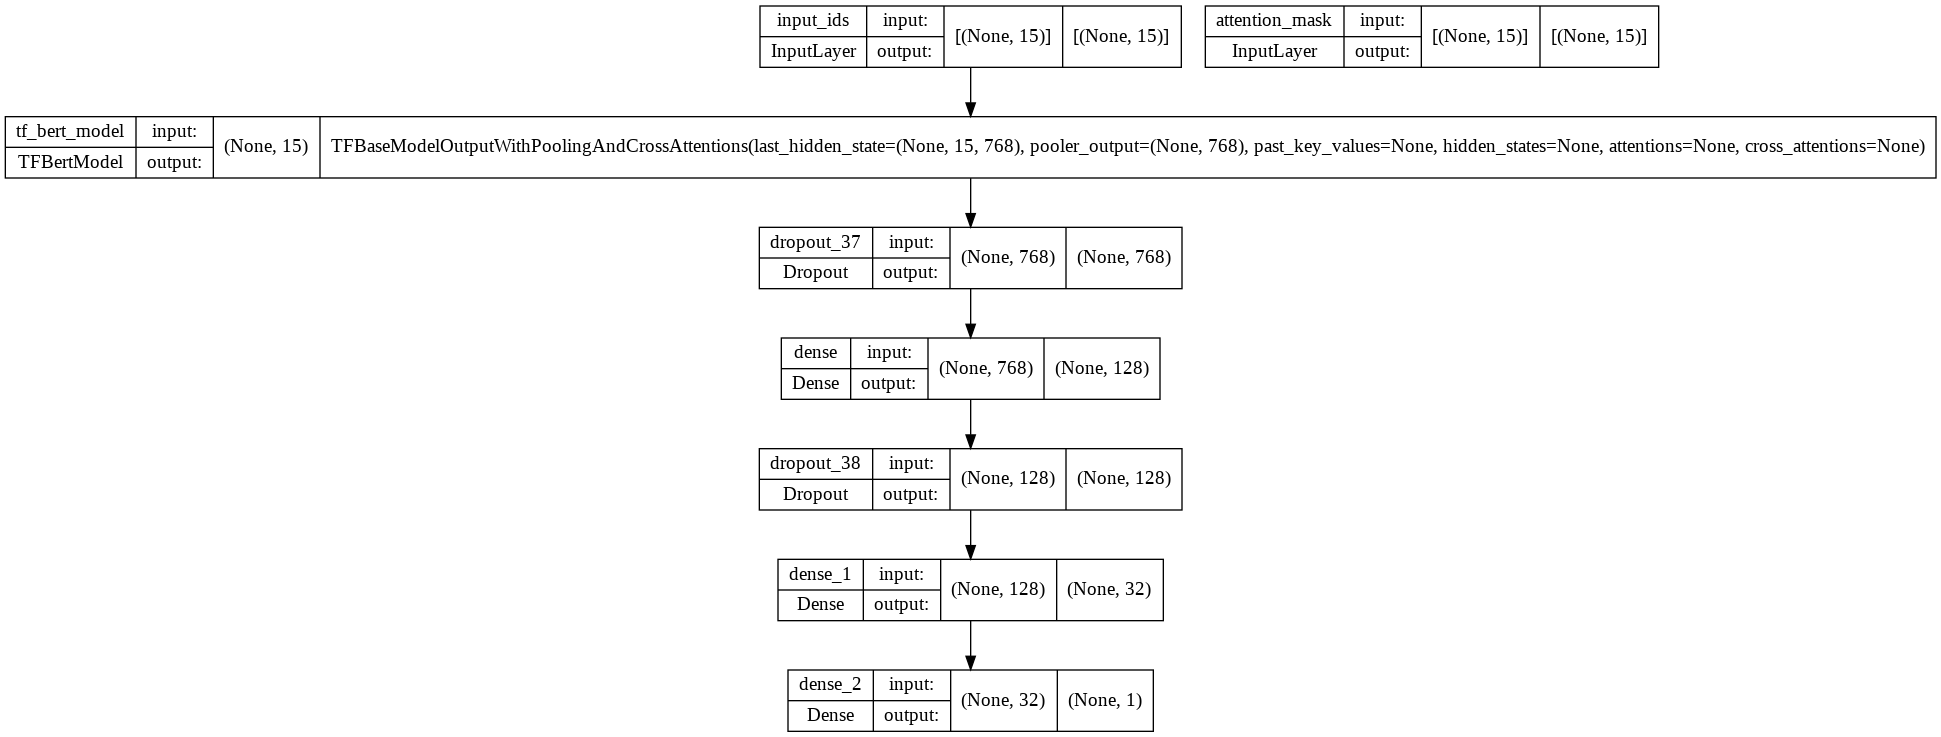

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
y_train = train_labels.values
y_train

array([1, 1, 0, ..., 1, 1, 1])

Train mixed

In [ ]:
train_history = model.fit(
    x ={'input_ids':tokens_train['input_ids'],'attention_mask':tokens_train['attention_mask']} ,
    y = y_train,
    validation_split = 0.30,
    epochs=5,
    batch_size=10
)

Epoch 1/5
2802/2802 [==============================] - 287s 92ms/step - loss: 0.3614 - accuracy: 0.8533 - val_loss: 0.2802 - val_accuracy: 0.8933
Epoch 2/5
2802/2802 [==============================] - 254s 91ms/step - loss: 0.3004 - accuracy: 0.8841 - val_loss: 0.2687 - val_accuracy: 0.8982
Epoch 3/5
2802/2802 [==============================] - 254s 91ms/step - loss: 0.2873 - accuracy: 0.8909 - val_loss: 0.2622 - val_accuracy: 0.9015
Epoch 4/5
2802/2802 [==============================] - 254s 91ms/step - loss: 0.2835 - accuracy: 0.8934 - val_loss: 0.2593 - val_accuracy: 0.9029
Epoch 5/5
2802/2802 [==============================] - 256s 92ms/step - loss: 0.2794 - accuracy: 0.8931 - val_loss: 0.2571 - val_accuracy: 0.9043


In [ ]:
predicted = model.predict({'input_ids':tokens_temp['input_ids'],'attention_mask':tokens_temp['attention_mask']})

In [ ]:
predicted 

array([[0.14100231],
       [0.07854661],
       [0.25579   ],
       ...,
       [0.9736791 ],
       [0.86346346],
       [0.05387829]], dtype=float32)

In [ ]:
y_predicted = np.where(predicted>0.5,1,0)

In [ ]:
y_predicted.shape

(10007, 1)

In [ ]:
y_predicted

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
y_predicted = y_predicted.reshape((1,10007))[0]

In [ ]:
y_predicted

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
y_test = temp_labels
y_test


index
41233    0
8732     1
35881    0
24172    0
35087    0
        ..
9686     1
3741     1
20970    1
8357     1
28384    0
Name: label, Length: 10007, dtype: int64

In [ ]:
y_test.shape

(10007,)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test,y_predicted))
print(accuracy_score(y_test,y_predicted))
print(classification_report(y_test,y_predicted))

[[4463  570]
 [ 452 4522]]
0.89787148995703
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      5033
           1       0.89      0.91      0.90      4974

    accuracy                           0.90     10007
   macro avg       0.90      0.90      0.90     10007
weighted avg       0.90      0.90      0.90     10007



Testing on Covid data (Cross domain testing)

In [ ]:
predicted2 = model.predict({'input_ids':tokens_val['input_ids'],'attention_mask':tokens_val['attention_mask']})

In [ ]:
y_predicted2 = np.where(predicted2>0.5,1,0)

In [ ]:
y_predicted2.shape

(17535, 1)

In [ ]:
y_predicted2 = y_predicted2.reshape((1,17535))[0]

In [ ]:
y_predicted2

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
y_test2 = val_labels_cov
y_test2

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test2,y_predicted2))
print(accuracy_score(y_test2,y_predicted2))
print(classification_report(y_test2,y_predicted2))

[[2628 6104]
 [1480 7323]]
0.5674935842600514
              precision    recall  f1-score   support

           0       0.64      0.30      0.41      8732
           1       0.55      0.83      0.66      8803

    accuracy                           0.57     17535
   macro avg       0.59      0.57      0.53     17535
weighted avg       0.59      0.57      0.53     17535



In [ ]:
predicted3 = model.predict({'input_ids':tokens_test['input_ids'],'attention_mask':tokens_test['attention_mask']})

In [ ]:
y_predicted3 = np.where(predicted3>0.5,1,0)

In [ ]:
y_predicted3.shape

(6820, 1)

In [ ]:
y_predicted3 = y_predicted3.reshape((1,6820))[0]

In [ ]:
y_predicted3

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test3 = test_labels_cov
y_test3

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test3,y_predicted3))
print(accuracy_score(y_test3,y_predicted3))
print(classification_report(y_test3,y_predicted3))

[[1081 2374]
 [ 565 2800]]
0.5690615835777126
              precision    recall  f1-score   support

           0       0.66      0.31      0.42      3455
           1       0.54      0.83      0.66      3365

    accuracy                           0.57      6820
   macro avg       0.60      0.57      0.54      6820
weighted avg       0.60      0.57      0.54      6820



Test

File transfer
---

In [ ]:
test_labels_cov=df2.loc[:,"label"]

In [ ]:
test_labels_cov.shape

(6820,)

In [ ]:
print(test_labels_cov)

index
0       1
1       0
2       1
3       0
4       0
       ..
6815    0
6816    0
6817    0
6818    1
6819    1
Name: label, Length: 6820, dtype: int64


In [ ]:
test_labels = pd.DataFrame(test_labels_cov, columns=['label']).to_csv('test_results.csv')

In [ ]:
y_predicted.shape

(6820, 1)

In [ ]:
prediction_error = pd.DataFrame(y_predicted, columns=['Label']).to_csv('prediction_error.csv')

Model_Saving
---

In [ ]:
import torch
path ='saved_weights.pt'
torch.save(model,path)

pipeline
---

In [ ]:
#from transformers import pipeline
#classifier = pipeline("text-classification", model = "model", tokenizer="tokenizer")


Local_Model_Interpretation